<a href="https://colab.research.google.com/github/angshumansinha/7-Days-of-Data-Analysis/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install lazypredict

     |████████████████████████████████| 10.1 MB 11.2 MB/s 
     |████████████████████████████████| 14.5 MB 8.0 kB/s 
     |████████████████████████████████| 1.2 MB 44.7 MB/s 
     |████████████████████████████████| 25.9 MB 1.0 kB/s 
     |████████████████████████████████| 269 kB 64.7 MB/s 
     |████████████████████████████████| 6.8 MB 42.4 MB/s 
     |████████████████████████████████| 302 kB 51.3 MB/s 
     |████████████████████████████████| 127.6 MB 6.8 kB/s 
     |████████████████████████████████| 248 kB 63.7 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=9e75b3aca74c1ffac40fcd63ab6fde10205b6b09fca1e520f6c7893e240f9717
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully 

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#reading the dataset
df=pd.read_csv("/content/Train Set.csv")
df.head()

State  Account Length  Area Code  ... Intl Charge CustServ Calls  Churn?
0    KS             128     415.00  ...        2.70              1  False.
1    OH             107     415.00  ...        3.70              1  False.
2    NJ             137     415.00  ...        3.29              0  False.
3    OH              84     408.00  ...        1.78              2  False.
4    OK              75     415.00  ...        2.73              3  False.

[5 rows x 21 columns]

In [3]:
#checking the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3027 non-null   object 
 1   Account Length  3027 non-null   int64  
 2   Area Code       3026 non-null   float64
 3   Phone           3027 non-null   object 
 4   Int'l Plan      3027 non-null   object 
 5   VMail Plan      3027 non-null   object 
 6   VMail Message   3024 non-null   float64
 7   Day Mins        3024 non-null   float64
 8   Day Calls       3026 non-null   float64
 9   Day Charge      3025 non-null   float64
 10  Eve Mins        3025 non-null   float64
 11  Eve Calls       3021 non-null   float64
 12  Eve Charge      3021 non-null   float64
 13  Night Mins      3024 non-null   float64
 14  Night Calls     3025 non-null   float64
 15  Night Charge    3023 non-null   float64
 16  Intl Mins       3023 non-null   float64
 17  Intl Calls      3026 non-null   f

***Metadata***
Description
 An individual’s decision to churn results from various factors. Intuitively, it is influenced by the Plan, engagement etc.
Fields
<br>
The dataset contains 21 columns<br>
State: State where customer is located
Account Length: How long customer has been holding this account
Area Code: Area Code where customer is located
Phone: Phone number of customer
Int'l Plan: If the customer has international plan
VMail Plan: If the customer has voice mail plan
VMail Message: # of Vmail messages
Day Mins: Total time spent on voice call during day
Day Calls: # of calls during Day
Day Charge: Total charge on calls during Day
Eve Mins: Total time spent on voice call during Eve
Eve Calls: # of calls during Eve
Eve Charge: Total charge on calls during Eve
Night Mins: Total time spent on voice call during Night
Night Calls: # of calls during Night
Night Charge: Total charge on calls during Night
Intl Mins: Total time spent on voice call during International
Intl Calls: # of calls during International
Intl Charge: Total charge on calls during International
CustServ Calls: Number of customer service calls
Target filed: Churn?
-- The Churn? is divided into two classes: False., True.


In [4]:
#checking for missing values
df.isnull().any()

State             False
Account Length    False
Area Code          True
Phone             False
Int'l Plan        False
VMail Plan        False
VMail Message      True
Day Mins           True
Day Calls          True
Day Charge         True
Eve Mins           True
Eve Calls          True
Eve Charge         True
Night Mins         True
Night Calls        True
Night Charge       True
Intl Mins          True
Intl Calls         True
Intl Charge        True
CustServ Calls    False
Churn?            False
dtype: bool

In [6]:
#working with float values initially
vmail_avg=df['VMail Message'].mean()
df['VMail Message'].replace(np.nan,vmail_avg,inplace=True)

In [9]:
df.iloc[:,7:19].head()

Day Mins  Day Calls  Day Charge  ...  Intl Mins  Intl Calls  Intl Charge
0    265.10     110.00       45.07  ...      10.00        3.00         2.70
1    161.60     123.00       27.47  ...      13.70        3.00         3.70
2    243.40     114.00       41.38  ...      12.20        5.00         3.29
3    299.40      71.00       50.90  ...       6.60        7.00         1.78
4    166.70     113.00       28.34  ...      10.10        3.00         2.73

[5 rows x 12 columns]

In [31]:
df.iloc[:,7:19].columns

Index(['Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge'],
      dtype='object')

In [14]:
for i in range(7,19):
  mean=df.iloc[:,i].mean() #taking average for specific columns
  df.iloc[:,i].replace(np.nan,mean,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3027 non-null   object 
 1   Account Length  3027 non-null   int64  
 2   Area Code       3026 non-null   float64
 3   Phone           3027 non-null   object 
 4   Int'l Plan      3027 non-null   object 
 5   VMail Plan      3027 non-null   object 
 6   VMail Message   3027 non-null   float64
 7   Day Mins        3027 non-null   float64
 8   Day Calls       3027 non-null   float64
 9   Day Charge      3027 non-null   float64
 10  Eve Mins        3027 non-null   float64
 11  Eve Calls       3027 non-null   float64
 12  Eve Charge      3027 non-null   float64
 13  Night Mins      3027 non-null   float64
 14  Night Calls     3027 non-null   float64
 15  Night Charge    3027 non-null   float64
 16  Intl Mins       3027 non-null   float64
 17  Intl Calls      3027 non-null   f

In [19]:
#for area code we will use mode operation
df['Area Code'].value_counts() #415 is the highest

415.00    1507
510.00     761
408.00     758
Name: Area Code, dtype: int64

In [20]:
df['Area Code'].replace(np.nan,415.00,inplace=True)

In [21]:
#again Area code need not be in float format
df['Area Code']=df['Area Code'].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3027 non-null   object 
 1   Account Length  3027 non-null   int64  
 2   Area Code       3027 non-null   int64  
 3   Phone           3027 non-null   object 
 4   Int'l Plan      3027 non-null   object 
 5   VMail Plan      3027 non-null   object 
 6   VMail Message   3027 non-null   float64
 7   Day Mins        3027 non-null   float64
 8   Day Calls       3027 non-null   float64
 9   Day Charge      3027 non-null   float64
 10  Eve Mins        3027 non-null   float64
 11  Eve Calls       3027 non-null   float64
 12  Eve Charge      3027 non-null   float64
 13  Night Mins      3027 non-null   float64
 14  Night Calls     3027 non-null   float64
 15  Night Charge    3027 non-null   float64
 16  Intl Mins       3027 non-null   float64
 17  Intl Calls      3027 non-null   f

In [25]:
#converting some basic types
df['Churn?'].unique()

array(['False.', 'True.'], dtype=object)

In [23]:
#finally we have a better dataset with no missing values
#lets do some basic eda
df.describe(include='all')

State  Account Length  Area Code  ... Intl Charge CustServ Calls  Churn?
count   3027         3027.00    3027.00  ...     3027.00        3027.00    3027
unique    51             nan        nan  ...         nan            nan       2
top       WV             nan        nan  ...         nan            nan  False.
freq      91             nan        nan  ...         nan            nan    2588
mean     NaN          101.03     437.13  ...        2.76           1.55     NaN
std      NaN           39.89      42.33  ...        0.75           1.31     NaN
min      NaN            1.00     408.00  ...        0.00           0.00     NaN
25%      NaN           74.00     408.00  ...        2.30           1.00     NaN
50%      NaN          101.00     415.00  ...        2.78           1.00     NaN
75%      NaN          127.00     510.00  ...        3.27           2.00     NaN
max      NaN          243.00     510.00  ...        5.40           9.00     NaN

[11 rows x 21 columns]

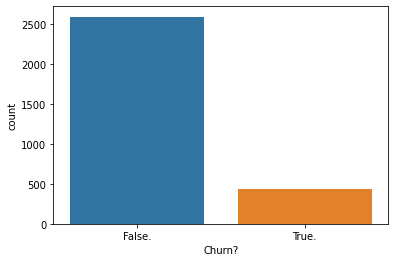

In [26]:
#proportion of customer churns
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn?',data=df)

We can see that more no of customers are likely to retain #if needed we have to balance the data

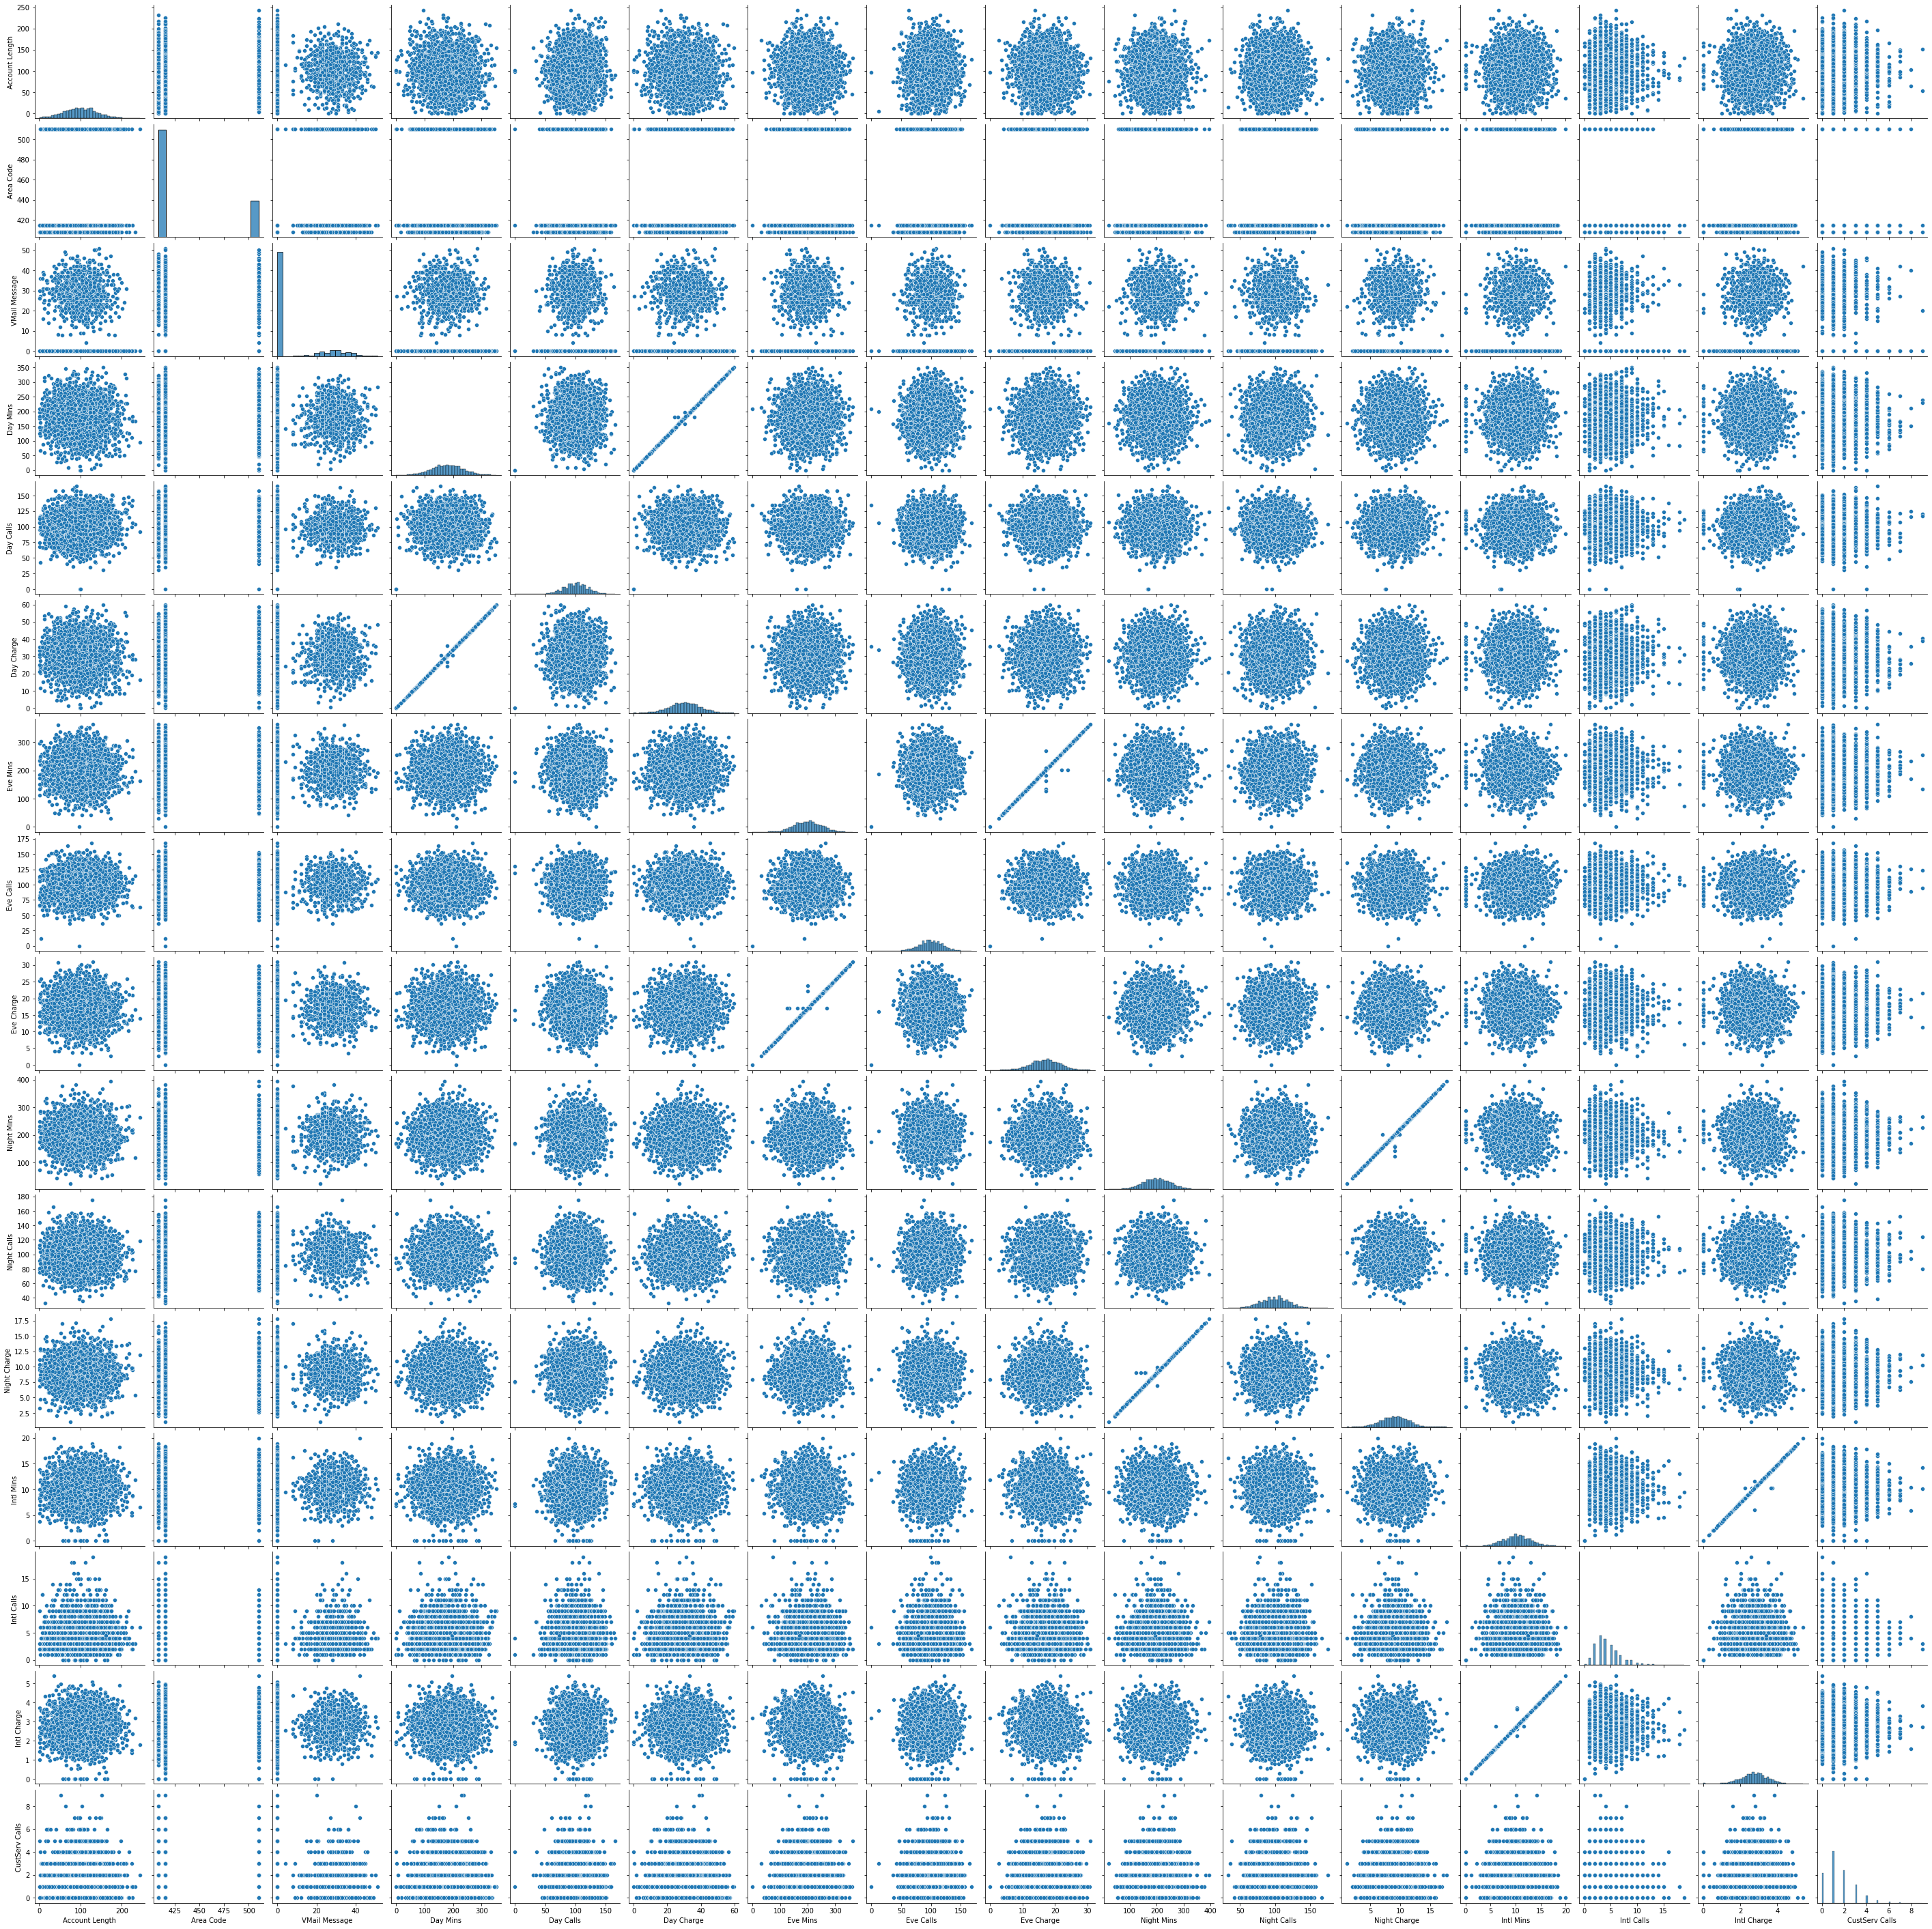

In [27]:
#an overall pairplot describing the overall distribution and visualization
sns.pairplot(df)

If we look at the distribution of the continuous features, we can see that majority of them have a bell shaped curve with flat peak. So data is almost symmetrical. It follows normal distribution. If needed for the model we might have to transform then.

In [30]:
#VMail Message: # of Vmail messages
df.groupby('Churn?')['VMail Message'].mean()

Churn?
False.   8.56
True.    5.33
Name: VMail Message, dtype: float64

Retaining customers use more no of Vmail messages

In [32]:
#creating a pivot table
df.pivot_table(index =['Churn?'],
                       values =['Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge'],
                       aggfunc ='mean')

Day Calls  Day Charge  Day Mins  ...  Night Calls  Night Charge  Night Mins
Churn?                                   ...                                       
False.     100.28       29.79    175.23  ...        99.94          9.00      200.02
True.      100.94       35.20    207.08  ...       100.23          9.24      205.15

[2 rows x 12 columns]

We can analyse from the pivot table that at an average customers retaining and leaving have the same no of usage with respect to calls messages and charges

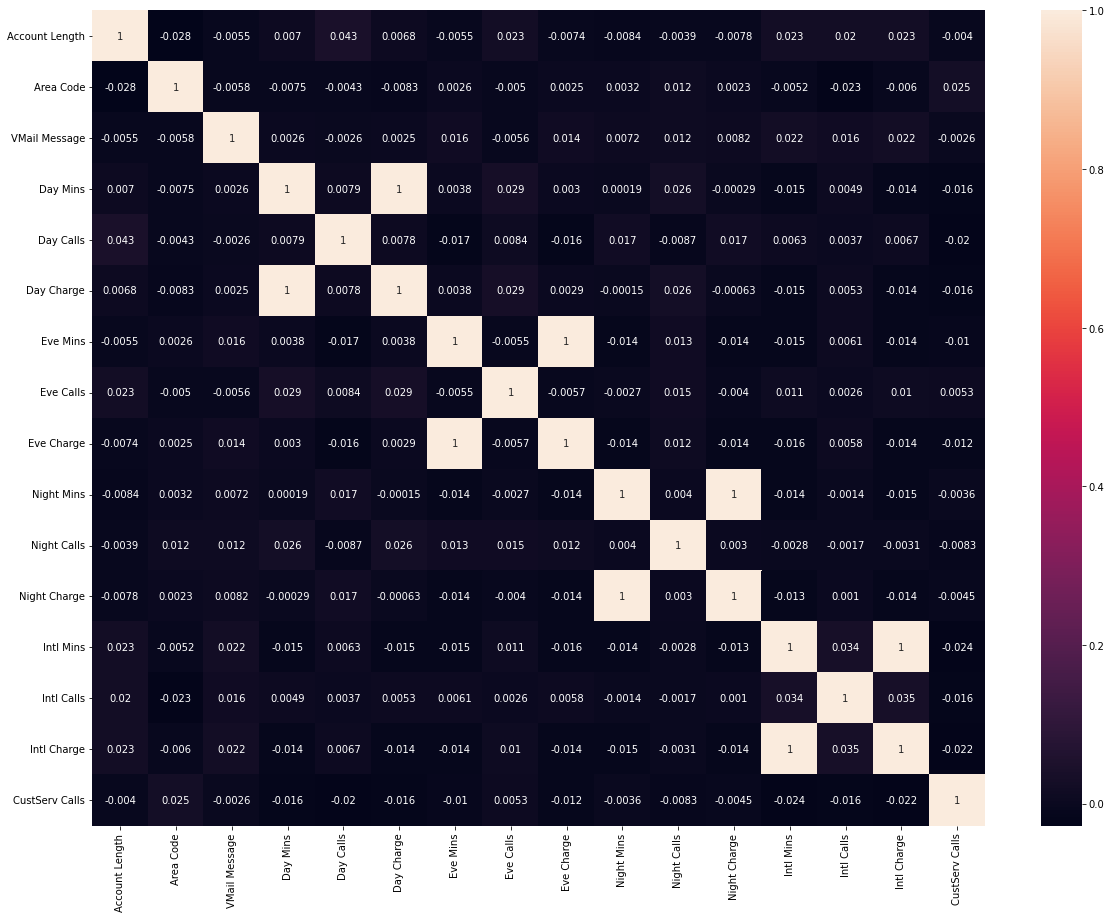

In [34]:
#lets check if there is any sort of collinearity in between the continuous variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)


Here we must note that for the no of calls the charge will obviously increase so correlation will be equal to 1 and that should not be an issue. For the rest of the variables, correlation is less so there are no signs of multicollinearity.

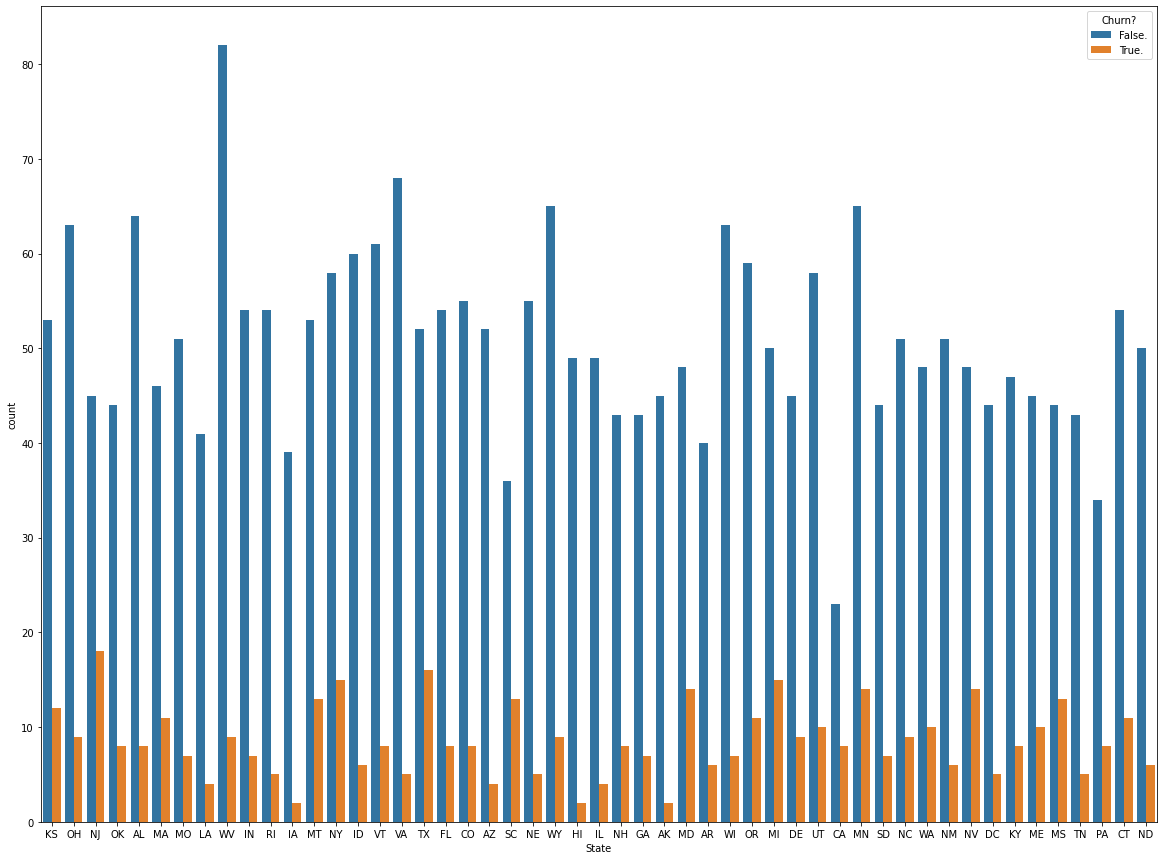

In [36]:
#for which state we have major customer retention and churn
plt.figure(figsize=(20,15))
sns.countplot(x='State',data=df,hue='Churn?')

We can see maximum customer retention is for state WV. And maximum customer churn is for state NJ

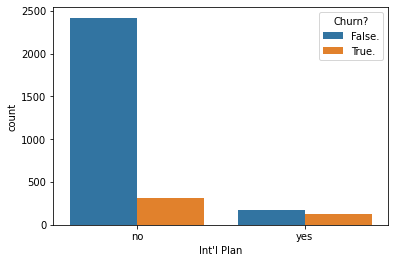

In [38]:
#lets check for int'l plan and voicemail plan
sns.countplot(x="Int'l Plan",data=df,hue='Churn?')

Customers who are retaining dont have a international plan

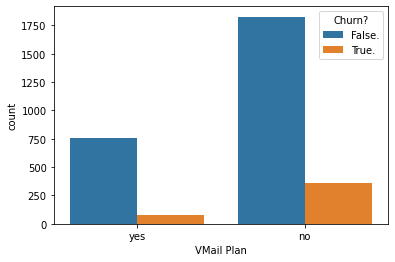

In [40]:
sns.countplot(x="VMail Plan",data=df,hue='Churn?')

Majority retaining customers dont need a Voicemail plan. This shows they are happy with the standard services provided by the company.

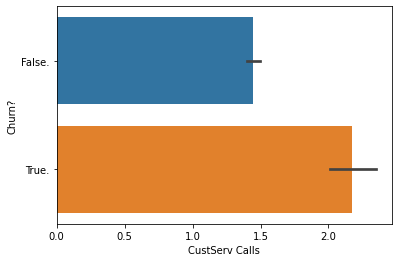

In [46]:
#checking for no of customer service calls
#converting to int 
df['CustServ Calls']=df['CustServ Calls'].astype('int')
sns.barplot(x="CustServ Calls",data=df,y='Churn?')

We can see that majority customers who want to churn have most no of customer service calls

In [51]:
#Feature Preprocessing and Feature Selection
#loading the test dataset with and without answers
df1=pd.read_excel("/content/Test Set.xlsx")
df1.head()

State  Account Length  Area Code  ... Intl Calls Intl Charge CustServ Calls
0    WV             101        415  ...          6        2.54              4
1    NV             129        415  ...          6        3.38              1
2    MA              67        415  ...          4        2.48              0
3    MI              37        415  ...          5        3.78              3
4    KY              64        415  ...          3        3.38              3

[5 rows x 20 columns]

In [52]:
df2=pd.read_excel("/content/Test Set_With Answers.xlsx")
df2.head()

State  Account Length  Area Code  ... Intl Charge CustServ Calls  Churn?
0    WV             101        415  ...        2.54              4  False.
1    NV             129        415  ...        3.38              1  False.
2    MA              67        415  ...        2.48              0  False.
3    MI              37        415  ...        3.78              3  False.
4    KY              64        415  ...        3.38              3  False.

[5 rows x 21 columns]

In [53]:
#now for three of the datasets some encoding is required so we use label encoder for that matter
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['State']=le.fit_transform(df["State"])
df1['State']=le.fit_transform(df1["State"])
df2['State']=le.fit_transform(df2["State"])

In [55]:
df['Phone']=le.fit_transform(df["Phone"])
df1['Phone']=le.fit_transform(df1["Phone"])
df2['Phone']=le.fit_transform(df2["Phone"])

df["Int'l Plan"]=le.fit_transform(df["Int'l Plan"])
df1["Int'l Plan"]=le.fit_transform(df1["Int'l Plan"])
df2["Int'l Plan"]=le.fit_transform(df2["Int'l Plan"])


In [57]:
df["VMail Plan"]=le.fit_transform(df["VMail Plan"])
df1["VMail Plan"]=le.fit_transform(df1["VMail Plan"])
df2["VMail Plan"]=le.fit_transform(df2["VMail Plan"])

df["Churn?"]=le.fit_transform(df["Churn?"])
df2["Churn?"]=le.fit_transform(df2["Churn?"])

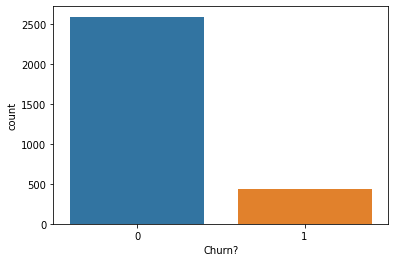

In [58]:
sns.countplot(x="Churn?",data=df) #0 represents False and 1 as True

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3027 non-null   int64  
 1   Account Length  3027 non-null   int64  
 2   Area Code       3027 non-null   int64  
 3   Phone           3027 non-null   int64  
 4   Int'l Plan      3027 non-null   int64  
 5   VMail Plan      3027 non-null   int64  
 6   VMail Message   3027 non-null   float64
 7   Day Mins        3027 non-null   float64
 8   Day Calls       3027 non-null   float64
 9   Day Charge      3027 non-null   float64
 10  Eve Mins        3027 non-null   float64
 11  Eve Calls       3027 non-null   float64
 12  Eve Charge      3027 non-null   float64
 13  Night Mins      3027 non-null   float64
 14  Night Calls     3027 non-null   float64
 15  Night Charge    3027 non-null   float64
 16  Intl Mins       3027 non-null   float64
 17  Intl Calls      3027 non-null   f

In [62]:
X_train=df.drop(columns="Churn?",axis="columns")
y_train=df['Churn?']
X_test=df2.drop(columns="Churn?",axis="columns")

Feature 0: 1.096632
Feature 1: 1.152782
Feature 2: 0.021300
Feature 3: 0.083486
Feature 4: 223.662572
Feature 5: 27.669287
Feature 6: 21.105020
Feature 7: 133.363032
Feature 8: 0.400257
Feature 9: 133.005275
Feature 10: 26.247072
Feature 11: 0.495041
Feature 12: 25.783747
Feature 13: 3.863188
Feature 14: 0.084527
Feature 15: 4.143858
Feature 16: 14.294323
Feature 17: 7.683938
Feature 18: 14.082235
Feature 19: 120.201328


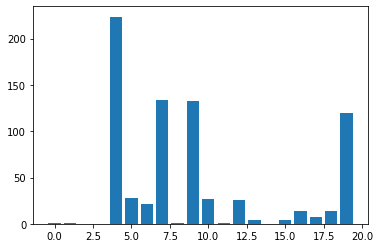

In [63]:
#lets proceed with Feature selection. This is more of a numerical(input) to categorical target(output)
# we will use the anova feature selection technique
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [64]:
#lets keep the importance threshold above 10
#for three of the datasets
f1=df.iloc[:,[4,5,6,7,9,10,12,16,18,19]]
f1.head()

Int'l Plan  VMail Plan  ...  Intl Charge  CustServ Calls
0           0           1  ...         2.70               1
1           0           1  ...         3.70               1
2           0           0  ...         3.29               0
3           1           0  ...         1.78               2
4           1           0  ...         2.73               3

[5 rows x 10 columns]

In [65]:
#similarly for for both the test
f2=df1.iloc[:,[4,5,6,7,9,10,12,16,18,19]] #without labels
f3=df2.iloc[:,[4,5,6,7,9,10,12,16,18,19]] #with labels

#targets
t1=df["Churn?"]
t2=df2["Churn?"]

In [66]:
#lets use lazypredict to see which model works better
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
### fitting data in LazyClassifier
models,predictions = clf.fit(f1,f3,t1,t2)
### lets check which model did better on Breast Cancer Dataset
print(models)

100%|██████████| 29/29 [00:04<00:00,  6.24it/s]


                               Accuracy  ...  Time Taken
Model                                    ...            
LGBMClassifier                     0.96  ...        0.18
BaggingClassifier                  0.95  ...        0.16
XGBClassifier                      0.95  ...        0.41
RandomForestClassifier             0.95  ...        0.65
DecisionTreeClassifier             0.92  ...        0.04
ExtraTreesClassifier               0.94  ...        0.33
ExtraTreeClassifier                0.90  ...        0.02
SVC                                0.93  ...        0.17
KNeighborsClassifier               0.91  ...        0.04
LabelPropagation                   0.89  ...        0.56
LabelSpreading                     0.89  ...        0.75
GaussianNB                         0.86  ...        0.03
NearestCentroid                    0.74  ...        0.02
AdaBoostClassifier                 0.90  ...        0.23
QuadraticDiscriminantAnalysis      0.43  ...        0.03
SGDClassifier                  

We can see LGBM, Random Forest CLassifiers perform well with the data

In [67]:
#lets use random forest and perform the parametric tuning 
#without parametric tuning
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(f1,t1)

RandomForestClassifier()

In [70]:
yhat=rf.predict(f3)

In [71]:
#lets check the classification report
from sklearn.metrics import classification_report
print(classification_report(yhat,t2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       268
           1       0.80      0.92      0.85        38

    accuracy                           0.96       306
   macro avg       0.89      0.94      0.92       306
weighted avg       0.96      0.96      0.96       306



we can see that we have a decent accuracy of 96 percent and good precision as well.
though for class 0 we have slightly higher because of the proportion of the data

In [73]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
#failed to work in the system due to low computational resources
#lets do some parametric tuning and see if the model performs better
#rf1 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(f1,t1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min


KeyboardInterrupt: ignored

In [75]:
!pip install yellowbrick

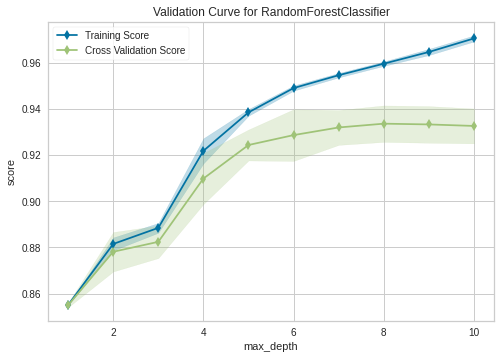

AxesSubplot(0.125,0.125;0.775x0.755)


In [76]:
from yellowbrick.model_selection import validation_curve 
# Plot the validation curve
print(validation_curve(rf, f1, t1, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=10, scoring="accuracy"))

we can see that accuracies wont have much of a difference if max_depth is set to 10. So bias and variance is also under control

In [77]:
rf1=RandomForestClassifier(max_depth=10)
rf1.fit(f1,t1)
yhat2=rf1.predict(f3)

In [78]:
print(classification_report(yhat2,t2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       268
           1       0.80      0.92      0.85        38

    accuracy                           0.96       306
   macro avg       0.89      0.94      0.92       306
weighted avg       0.96      0.96      0.96       306



We can see that there is no change in the precision and recall. So we will keep it as it is.

In [79]:
#lets finally use smote for imbalanced data and check if it creates any difference
!pip install imbalanced-learn

In [80]:
#failed to run
from imblearn.over_sampling import SMOTE

ImportError: ignored

In [81]:
#so finally lets use our good old model to predict the test
y_output=rf.predict(f2) #final test set output

In [82]:
output=pd.DataFrame(y_output)

In [83]:
output.to_csv("final_output.csv")